In [2]:
import pandas as pd 

dataset = pd.read_csv('tweets.csv', encoding = 'ISO-8859-1')

dataset.head(3)

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False


In [4]:
def gen_freq(text):
    word_list = []
    for tw_words in text.split():
        word_list.extend(tw_words)
    word_freq = pd.Series(word_list).value_counts()
    word_freq[:10]
    return word_freq

In [5]:
word_freq = gen_freq(dataset.text.str)
word_freq

RT                         11053
to                          7650
is                          5152
in                          4491
the                         4331
                           ...  
#News                          1
notes|                         1
https://t.co/ECl4oIzdHA        1
https://t.co/9MjFtLtCtR        1
https://t.co/hwgqjbqgvG        1
Name: count, Length: 19601, dtype: int64

In [6]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/00/09/abb305dce85911b8fba382926cfc57f2f257729e25937fdcc63f3a1a67f9/wordcloud-1.9.4-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/299.9 kB 62.2 kB/s eta 0:00:05
   --------- ----------------------------- 71.7/299.9 kB 170.7 kB/s eta 0:00:02
   --------- ----------------------------- 71.7/299.9

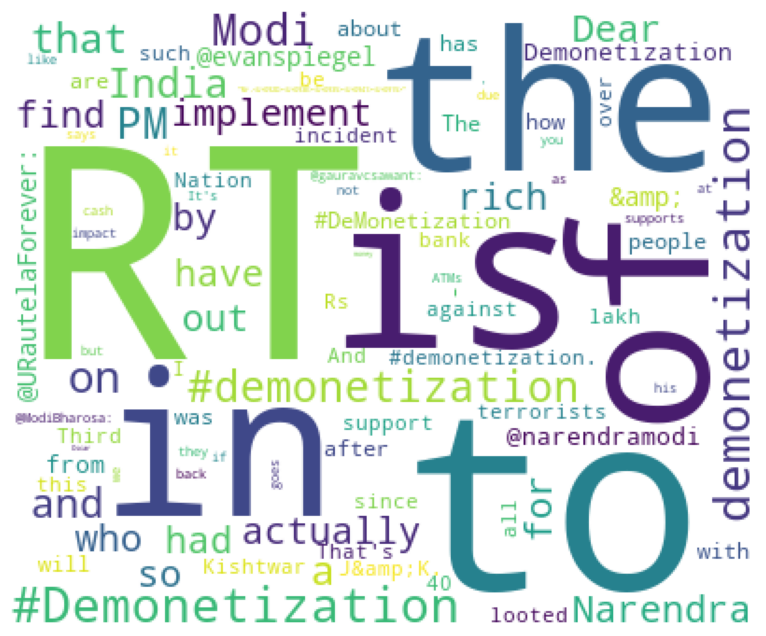

In [7]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wc = WordCloud(width=400, height=330, max_words=200, 
        background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(12, 8))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [9]:
import re
def clean_text(text):
    text=re.sub(r'RT','',text)
    text=re.sub(r'&amp','',text)
    text=re.sub(r'[?!.;:,#@-]','',text)
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'%', '', text)
    return text

In [10]:
from wordcloud import STOPWORDS
print(STOPWORDS)

{'ours', 'between', 'both', 'for', 'each', 'the', "can't", "who's", 'have', 'so', 'being', 'get', "i'm", "shan't", 'more', 'me', "wouldn't", 'below', "weren't", 'after', "i've", "there's", 'which', 'themselves', 'all', 'whom', 'would', 'further', 'been', 'of', 'his', 'we', "what's", "why's", "you'll", "shouldn't", "we're", 'a', 'hers', 'myself', 'same', 'shall', 'when', "she's", 'from', "it's", 'on', 'hence', 'you', "they've", 'then', 'or', "doesn't", "hadn't", "mustn't", 'com', 'k', "i'd", 'against', 'him', 'were', "you'd", 'own', 'like', 'up', 'www', "let's", 'should', 'are', 'while', 'herself', "they'd", 'down', 'he', 'itself', 'what', 'ever', 'some', 'cannot', "don't", 'into', 'that', 'over', "they'll", 'be', 'had', 'do', 'they', 'if', 'their', "they're", 'yourself', 'than', "he'd", "wasn't", 'our', 'therefore', 'am', 'why', 'as', 'it', "won't", 'http', "how's", 'is', 'in', 'has', "where's", "here's", 'out', 'because', 'its', 'however', 'no', 'those', "he's", "she'll", 'otherwise',

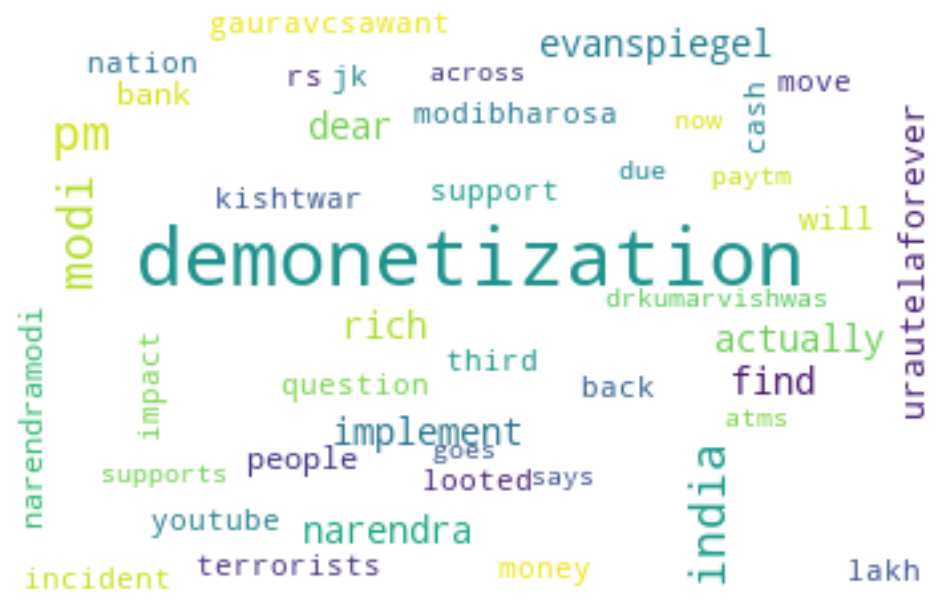

In [11]:
text = dataset.text.apply(lambda x: clean_text(x))
word_freq = gen_freq(text.str)
word_freq = word_freq.drop(labels=STOPWORDS, errors='ignore')
wc = WordCloud(width=350, height=220, max_words=500, 
               background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [1]:
import pandas as pd 
text = ['Sarah lives in a hut in the village.', 
      'She has an apple tree in her backyard.', 
      'The apples are red in colour.']
df = pd.DataFrame(text, columns=['Sentence'])
df

,Sentence
0,Sarah lives in a hut in the village.
1,She has an apple tree in her backyard.
2,The apples are red in colour.


In [2]:
!pip install spacy

In [4]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 220.2 kB/s eta 0:00:59
     --------------------------------------- 0.0/12.8 MB 219.4 kB/s eta 0:00:59
     --------------------------------------- 0.1/12.8 MB 403.5 kB/s eta 0:00:32
      -------------------------------------- 0.2/12.8 MB 778.2 kB/s eta 0:00:17
      --------------------------------------- 0.3/12.8 MB 1.1 MB/s eta 0:00:12
     - -------------------------------------- 0.6/12.8 MB 1.8 MB/s eta 0:00:07
     --- ------------------------------------ 1.1/12.8 MB 2.8 MB/s eta 0:00:05
     ---- ----------------------------------- 1.3/12.8 MB 3.0 MB/s eta 0:00:04
     ---- ----------------------------------- 1.4/12.8 MB 2.9 MB/s eta 0:00:

In [6]:
import spacy
nlp=spacy.load("en_core_web_sm")
token = []
pos = []
for sent in nlp.pipe(df['Sentence']):
    if sent.has_annotation('DEP'):
        token.append([word.text for word in sent])
        pos.append([word.pos_ for word in sent])

In [7]:
df['token']=token
df['pos']=pos

In [8]:
df.head()

,Sentence,token,pos
0,Sarah lives in a hut in the village.,"[Sarah, lives, in, a, hut, in, the, village, .]","[PROPN, VERB, ADP, DET, NOUN, ADP, DET, NOUN, ..."
1,She has an apple tree in her backyard.,"[She, has, an, apple, tree, in, her, backyard, .]","[PRON, VERB, DET, NOUN, NOUN, ADP, PRON, NOUN,..."
2,The apples are red in colour.,"[The, apples, are, red, in, colour, .]","[DET, NOUN, AUX, ADJ, ADP, NOUN, PUNCT]"


In [ ]:
text = 'I love NLP and I will learn NLP in 2 months'

In [9]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\ganap\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.


True

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
stop_words = set(stopwords.words('english'))
tokens = sent_tokenize(text)
for i in tokens:
    words = nltk.word_tokenize(i)
    words = [w for w in words if not w in stop_words]
    tags = nltk.pos_tag(words)
tags

TypeError: expected string or bytes-like object, got 'list'

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('data/tripadvisor_hotel_reviews.csv')
df.head()